<a href="https://colab.research.google.com/github/rrubel1821/Student-Performance-Analysis-and-Visualization/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Student Name Student ID  Subject  Score  Attendance Percentage  \
0        Alice    STU-001     Math     85                     80   
1          Bob    STU-002  Science     90                     95   
2      Charlie    STU-003  History     78                     70   

  Assignment Completion  
0                   Yes  
1                   Yes  
2                    No  
Average Score: 84.33333333333333
Minimum Score: 78
Maximum Score: 90
Low Attendance:
   Student Name Student ID  Subject  Score  Attendance Percentage  \
2      Charlie    STU-003  History     78                     70   

  Assignment Completion  
2                    No  
Missing Assignments:
   Student Name Student ID  Subject  Score  Attendance Percentage  \
2      Charlie    STU-003  History     78                     70   

  Assignment Completion  
2                    No  
Failing Students:
 Empty DataFrame
Columns: [Student Name, Student ID, Subject, Score, Attendance Percentage, Assignment Completion]
Inde

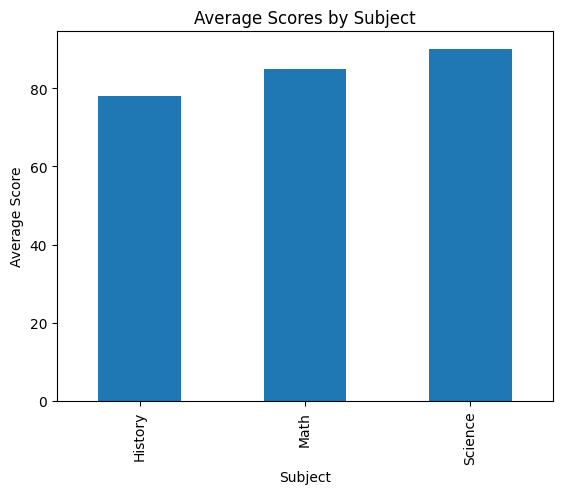

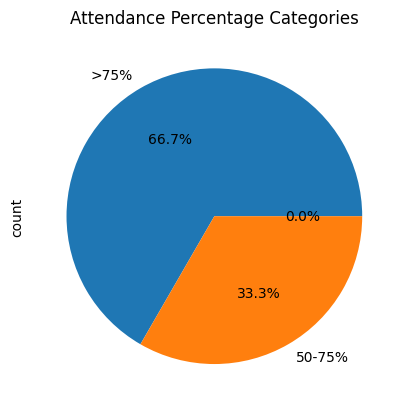

Aggregate Score for STU-001: 85
  Student Name Student ID  Subject  Score  Attendance Percentage  \
0        Alice    STU-001     Math     85                     80   
1          Bob    STU-002  Science     90                     95   
2      Charlie    STU-003  History     78                     70   

  Assignment Completion Grade  
0                   Yes     B  
1                   Yes     A  
2                    No     B  
File not found. Please check the file path.
True
False
Enter Student Name: Noor Nobi
Enter Student ID: stu-004
Enter Subject: biology
Enter Score: 78
Enter Attendance Percentage: 100
Assignment Completed (Yes/No): Yes
  Student Name Student ID  Subject Score Attendance Percentage  \
0        Alice    STU-001     Math    85                    80   
1          Bob    STU-002  Science    90                    95   
2      Charlie    STU-003  History    78                    70   
3    Noor Nobi    stu-004  biology    78                   100   

  Assignment Compl

In [4]:
import pandas as pd

data = {
    'Student Name': ['Alice', 'Bob', 'Charlie'],
    'Student ID': ['STU-001', 'STU-002', 'STU-003'],
    'Subject': ['Math', 'Science', 'History'],
    'Score': ['85', '90', '78'],
    'Attendance Percentage': [80, 95, 70],
    'Assignment Completion': ['Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df.to_csv('student_performance.csv', index=False)

df = pd.read_csv('student_performance.csv')
print(df)
df.to_csv('updated_student_performance.csv', index=False)

df['Score'] = df['Score'].astype(int)
print("Average Score:", df['Score'].mean())
print("Minimum Score:", df['Score'].min())
print("Maximum Score:", df['Score'].max())

low_attendance = df[df['Attendance Percentage'] < 75]
missing_assignments = df[df['Assignment Completion'] == 'No']
print("Low Attendance:\n", low_attendance)
print("Missing Assignments:\n", missing_assignments)

failing_students = df[df['Score'] < 50]
print("Failing Students:\n", failing_students)

df['Score'] = df['Score'].astype(int)

import matplotlib.pyplot as plt
subject_scores = df.groupby('Subject')['Score'].mean()
subject_scores.plot(kind='bar')
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

attendance_categories = pd.cut(df['Attendance Percentage'], bins=[0, 50, 75, 100], labels=['<50%', '50-75%', '>75%'])
attendance_counts = attendance_categories.value_counts()
attendance_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Attendance Percentage Categories')
plt.show()

def calculate_aggregate(student_id):
    student_data = df[df['Student ID'] == student_id]
    return student_data['Score'].sum()

# Example usage
print("Aggregate Score for STU-001:", calculate_aggregate('STU-001'))

def determine_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 50:
        return 'C'
    else:
        return 'Fail'

# Example usage
df['Grade'] = df['Score'].apply(determine_grade)
print(df)

import logging

logging.basicConfig(level=logging.INFO)

def log_execution(func):
    def wrapper(*args, **kwargs):
        logging.info(f'Executing {func.__name__}')
        return func(*args, **kwargs)
    return wrapper

try:
    df = pd.read_csv('non_existent_file.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")

import re

def validate_student_id(student_id):
    pattern = r'^STU-\d{5}$'
    if re.match(pattern, student_id):
        return True
    else:
        return False

# Example usage
print(validate_student_id('STU-12345'))
print(validate_student_id('12345-STU'))

new_student = {
    'Student Name': input("Enter Student Name: "),
    'Student ID': input("Enter Student ID: "),
    'Subject': input("Enter Subject: "),
    'Score': input("Enter Score: "),
    'Attendance Percentage': input("Enter Attendance Percentage: "),
    'Assignment Completion': input("Assignment Completed (Yes/No): ")
}
df = df._append(new_student, ignore_index=True)
print(df)
